In [163]:
import gym
import numpy as np
from collections import defaultdict 

import matplotlib as mpl
import matplotlib.pyplot as plt
import random

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rc('figure', **{'dpi': 300})

In [138]:
env = gym.make('Blackjack-v0', natural=True)
NumberOfStates = 2

In [139]:
def simple_stratagy(state):
    score, dealer, _ = state
    
    if score < 19:
        return 1
    
    return 0
    

In [147]:
def run_episode(env, pi, eps=0.0):
    env.reset()
    state = env._get_obs()
        
    states = [(), state]
    actions = []
    done = False
    
    while True:
        action = pi(state) if np.random.rand() >= eps else np.random.randint(NumberOfStates)
        action = pi(state)
        actions.append(action)
        state, reward, done, _ = env.step(action)
        
        if done:
            break
        
        states.append(state)
   
    return states, actions, reward

In [168]:
def evaluate(env, stratagy, iterations=10000):
    rewards = np.zeros(iterations, dtype=np.double)
    
    for i in range(iterations):
        states, actions, reward = run_episode(env, stratagy)
        rewards[i] = reward 
    return rewards

In [169]:
revards = evaluate(env, simple_stratagy)


Text(0.5, 1.0, 'Оценка выигрыша простой стратегии')

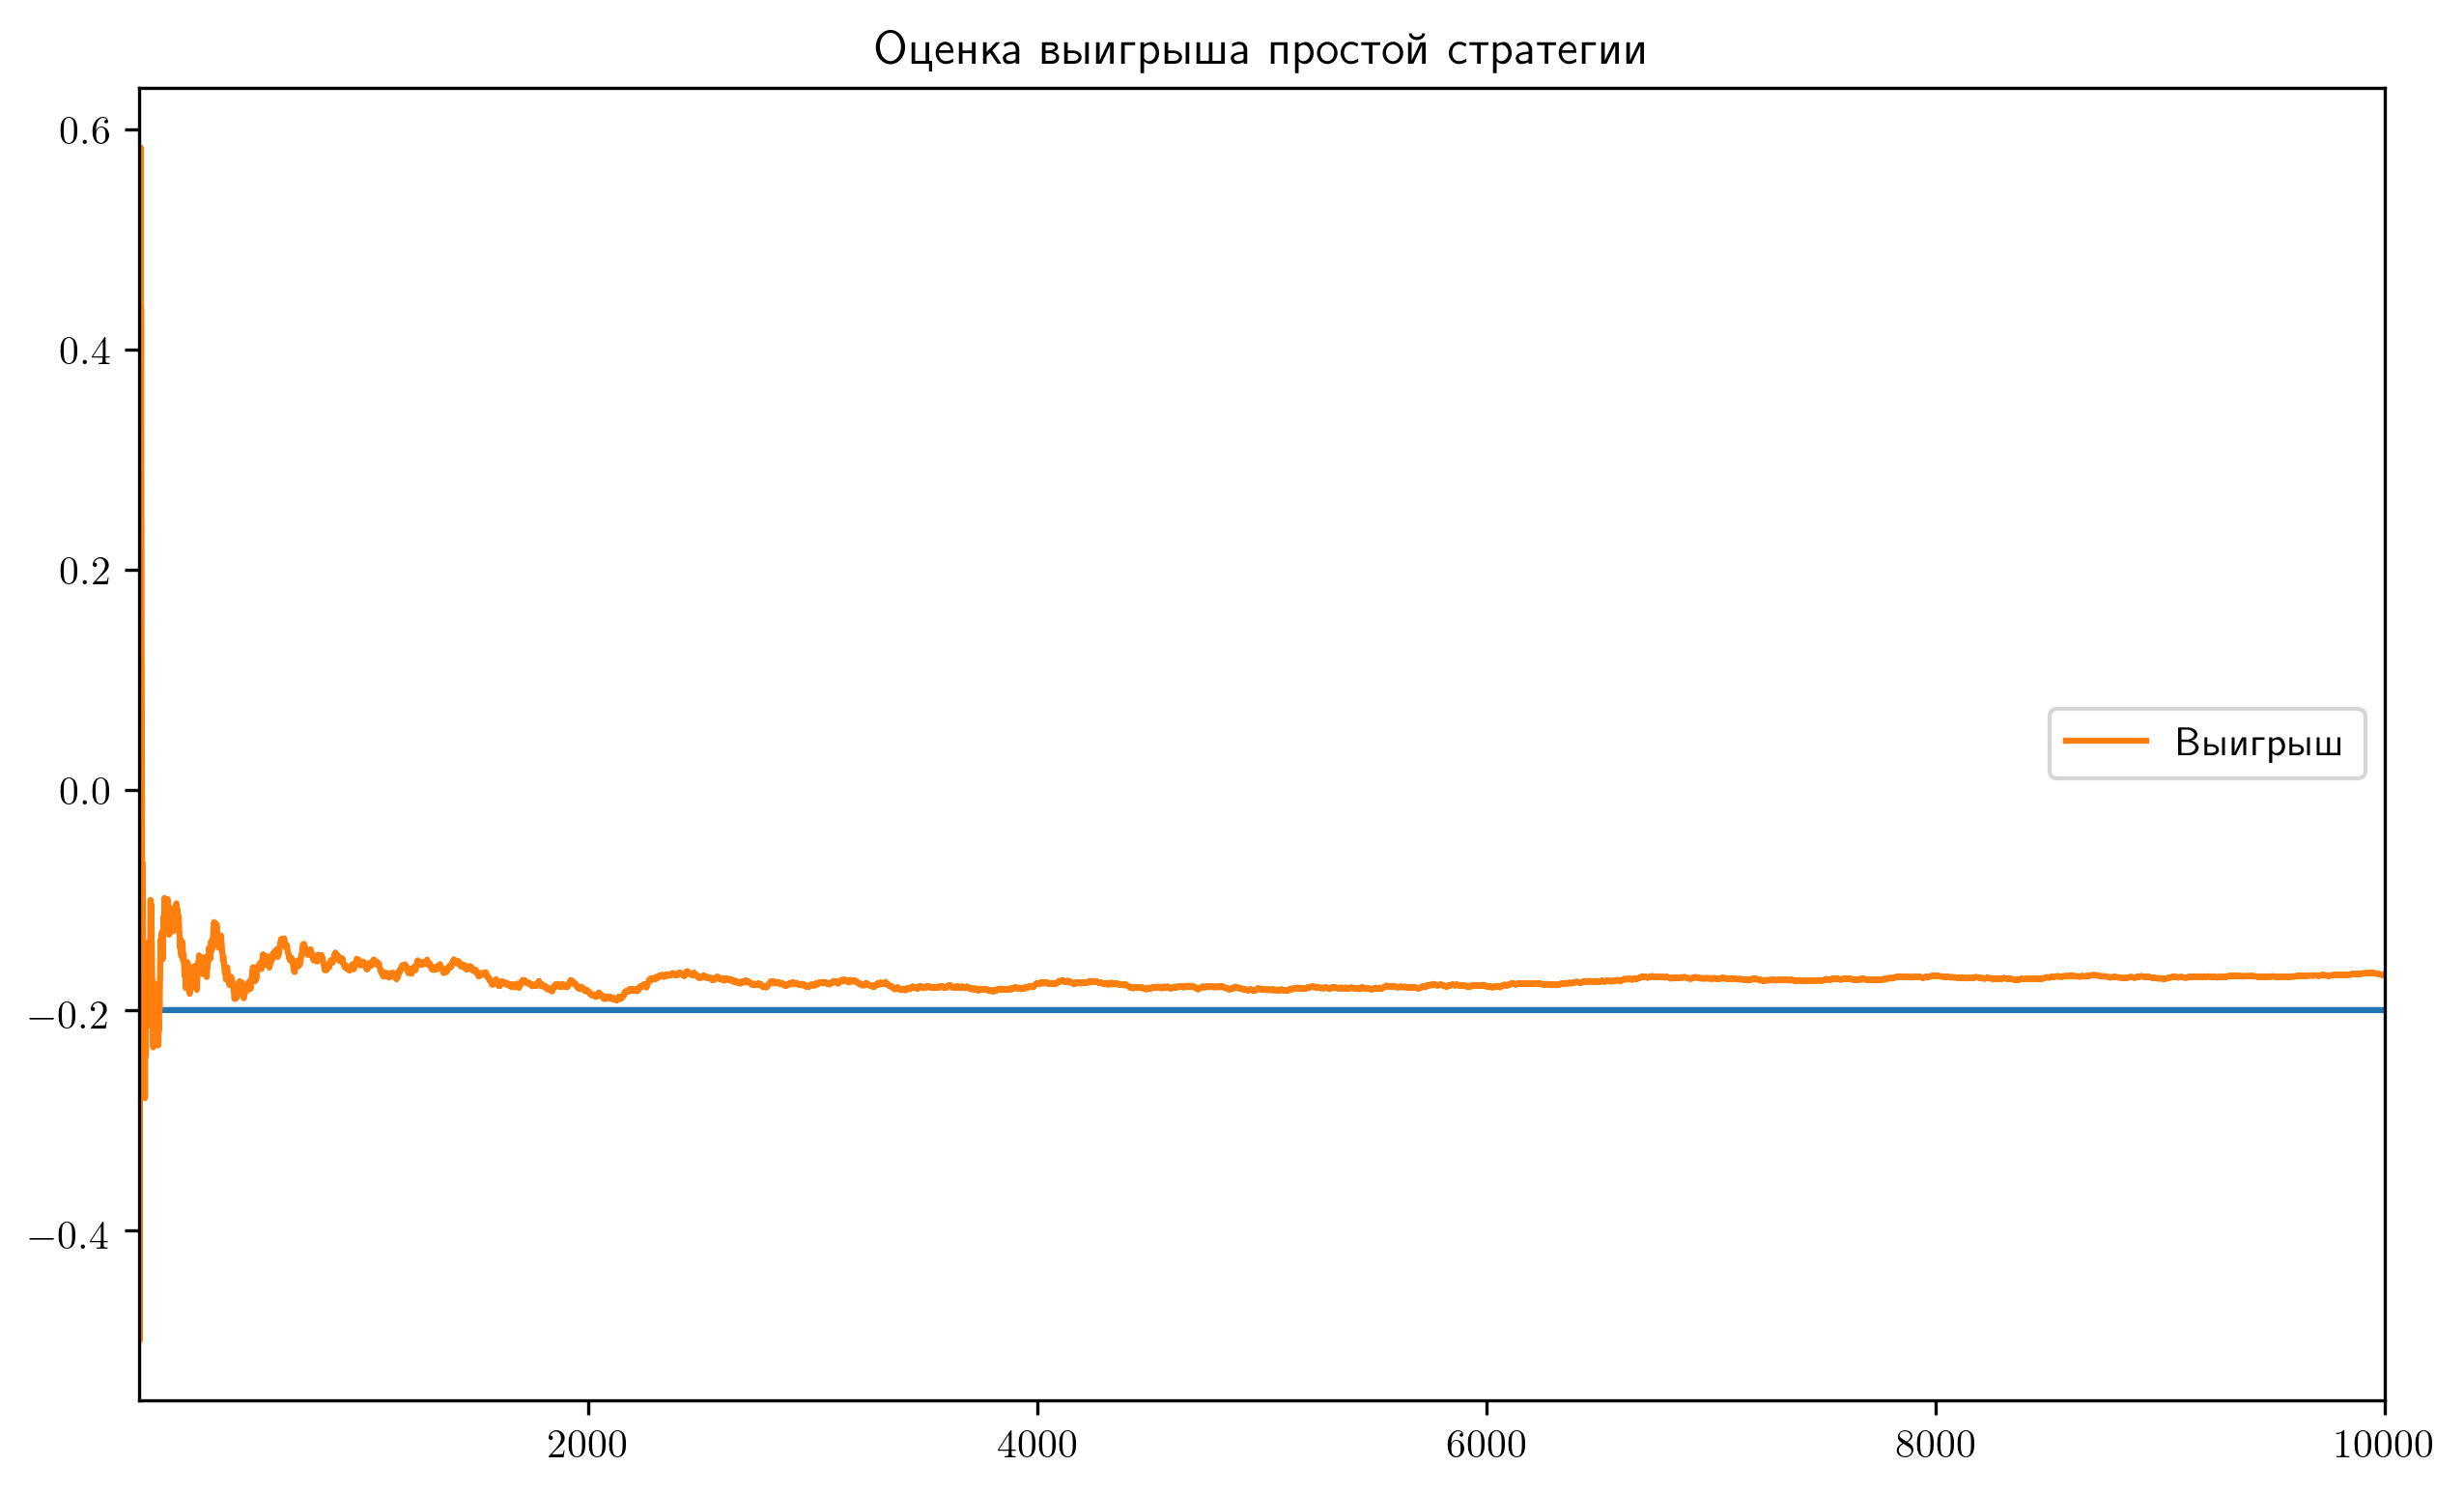

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.arange(1, len(revards)+1)
values = np.cumsum(revards) / x

ax.plot(np.repeat(-0.2, len(revards)))
ax.plot(x, values, label="Выигрыш", color="C1")
ax.set_xlim((1, len(revards)))
ax.legend(loc="center right")
plt.title("Оценка выигрыша простой стратегии")

In [164]:
class Stratagy():
    def __init__(self, number_of_states):
        self.pi = defaultdict(lambda: random.randrange(number_of_states))
    
    def step(self, state):
        return self.pi[state]
        
    def update(self, Q, state):
        self.pi[state] = np.argmax(Q[state])


In [218]:
evaluations = {}

In [222]:
epsilongs = [0.05, 0.1, 0.2]
iterations = 100000
x = np.geomspace(1, iterations, num=20, dtype=int)

for e in epsilongs:
    print("eps =", e)
    strat = Stratagy(NumberOfStates)
    returns = defaultdict(list)
    Q = defaultdict(lambda: np.random.random(size=NumberOfStates))

    states_count = defaultdict(int)
    evaluations[e] = []

    for i in range(iterations+1):
        states, actions, reward = run_episode(env, strat.step, e)

        for j in range(len(actions)):
            state = states[j+1]
            action = actions[j]
            key = (state, action)
            returns[key].append(reward)
            Q[state][action] = sum(returns[key])/len(returns[key])
            strat.update(Q, state)

        if i in x:
            rews = evaluate(env, strat.step, 100000)
            evaluations[e].append(rews.mean())
            print("work in progress", i, evaluations[e][-1])
        


eps = 0.05
work in progress 1 -0.40396
work in progress 3 -0.390935
work in progress 6 -0.287035
work in progress 11 -0.27728
work in progress 20 -0.26009
work in progress 37 -0.24949
work in progress 69 -0.252285
work in progress 127 -0.228005
work in progress 233 -0.23217
work in progress 428 -0.17861
work in progress 784 -0.159825
work in progress 1438 -0.14757
work in progress 2636 -0.14466
work in progress 4832 -0.145125
work in progress 8858 -0.15203
work in progress 16237 -0.151725
work in progress 29763 -0.15423
work in progress 54555 -0.14794
work in progress 100000 -0.14843
eps = 0.1
work in progress 1 -0.355235
work in progress 3 -0.343705
work in progress 6 -0.32202
work in progress 11 -0.309175
work in progress 20 -0.29672
work in progress 37 -0.274325
work in progress 69 -0.219985
work in progress 127 -0.192575
work in progress 233 -0.1626
work in progress 428 -0.157225
work in progress 784 -0.12808
work in progress 1438 -0.134225
work in progress 2636 -0.12384
work in pr

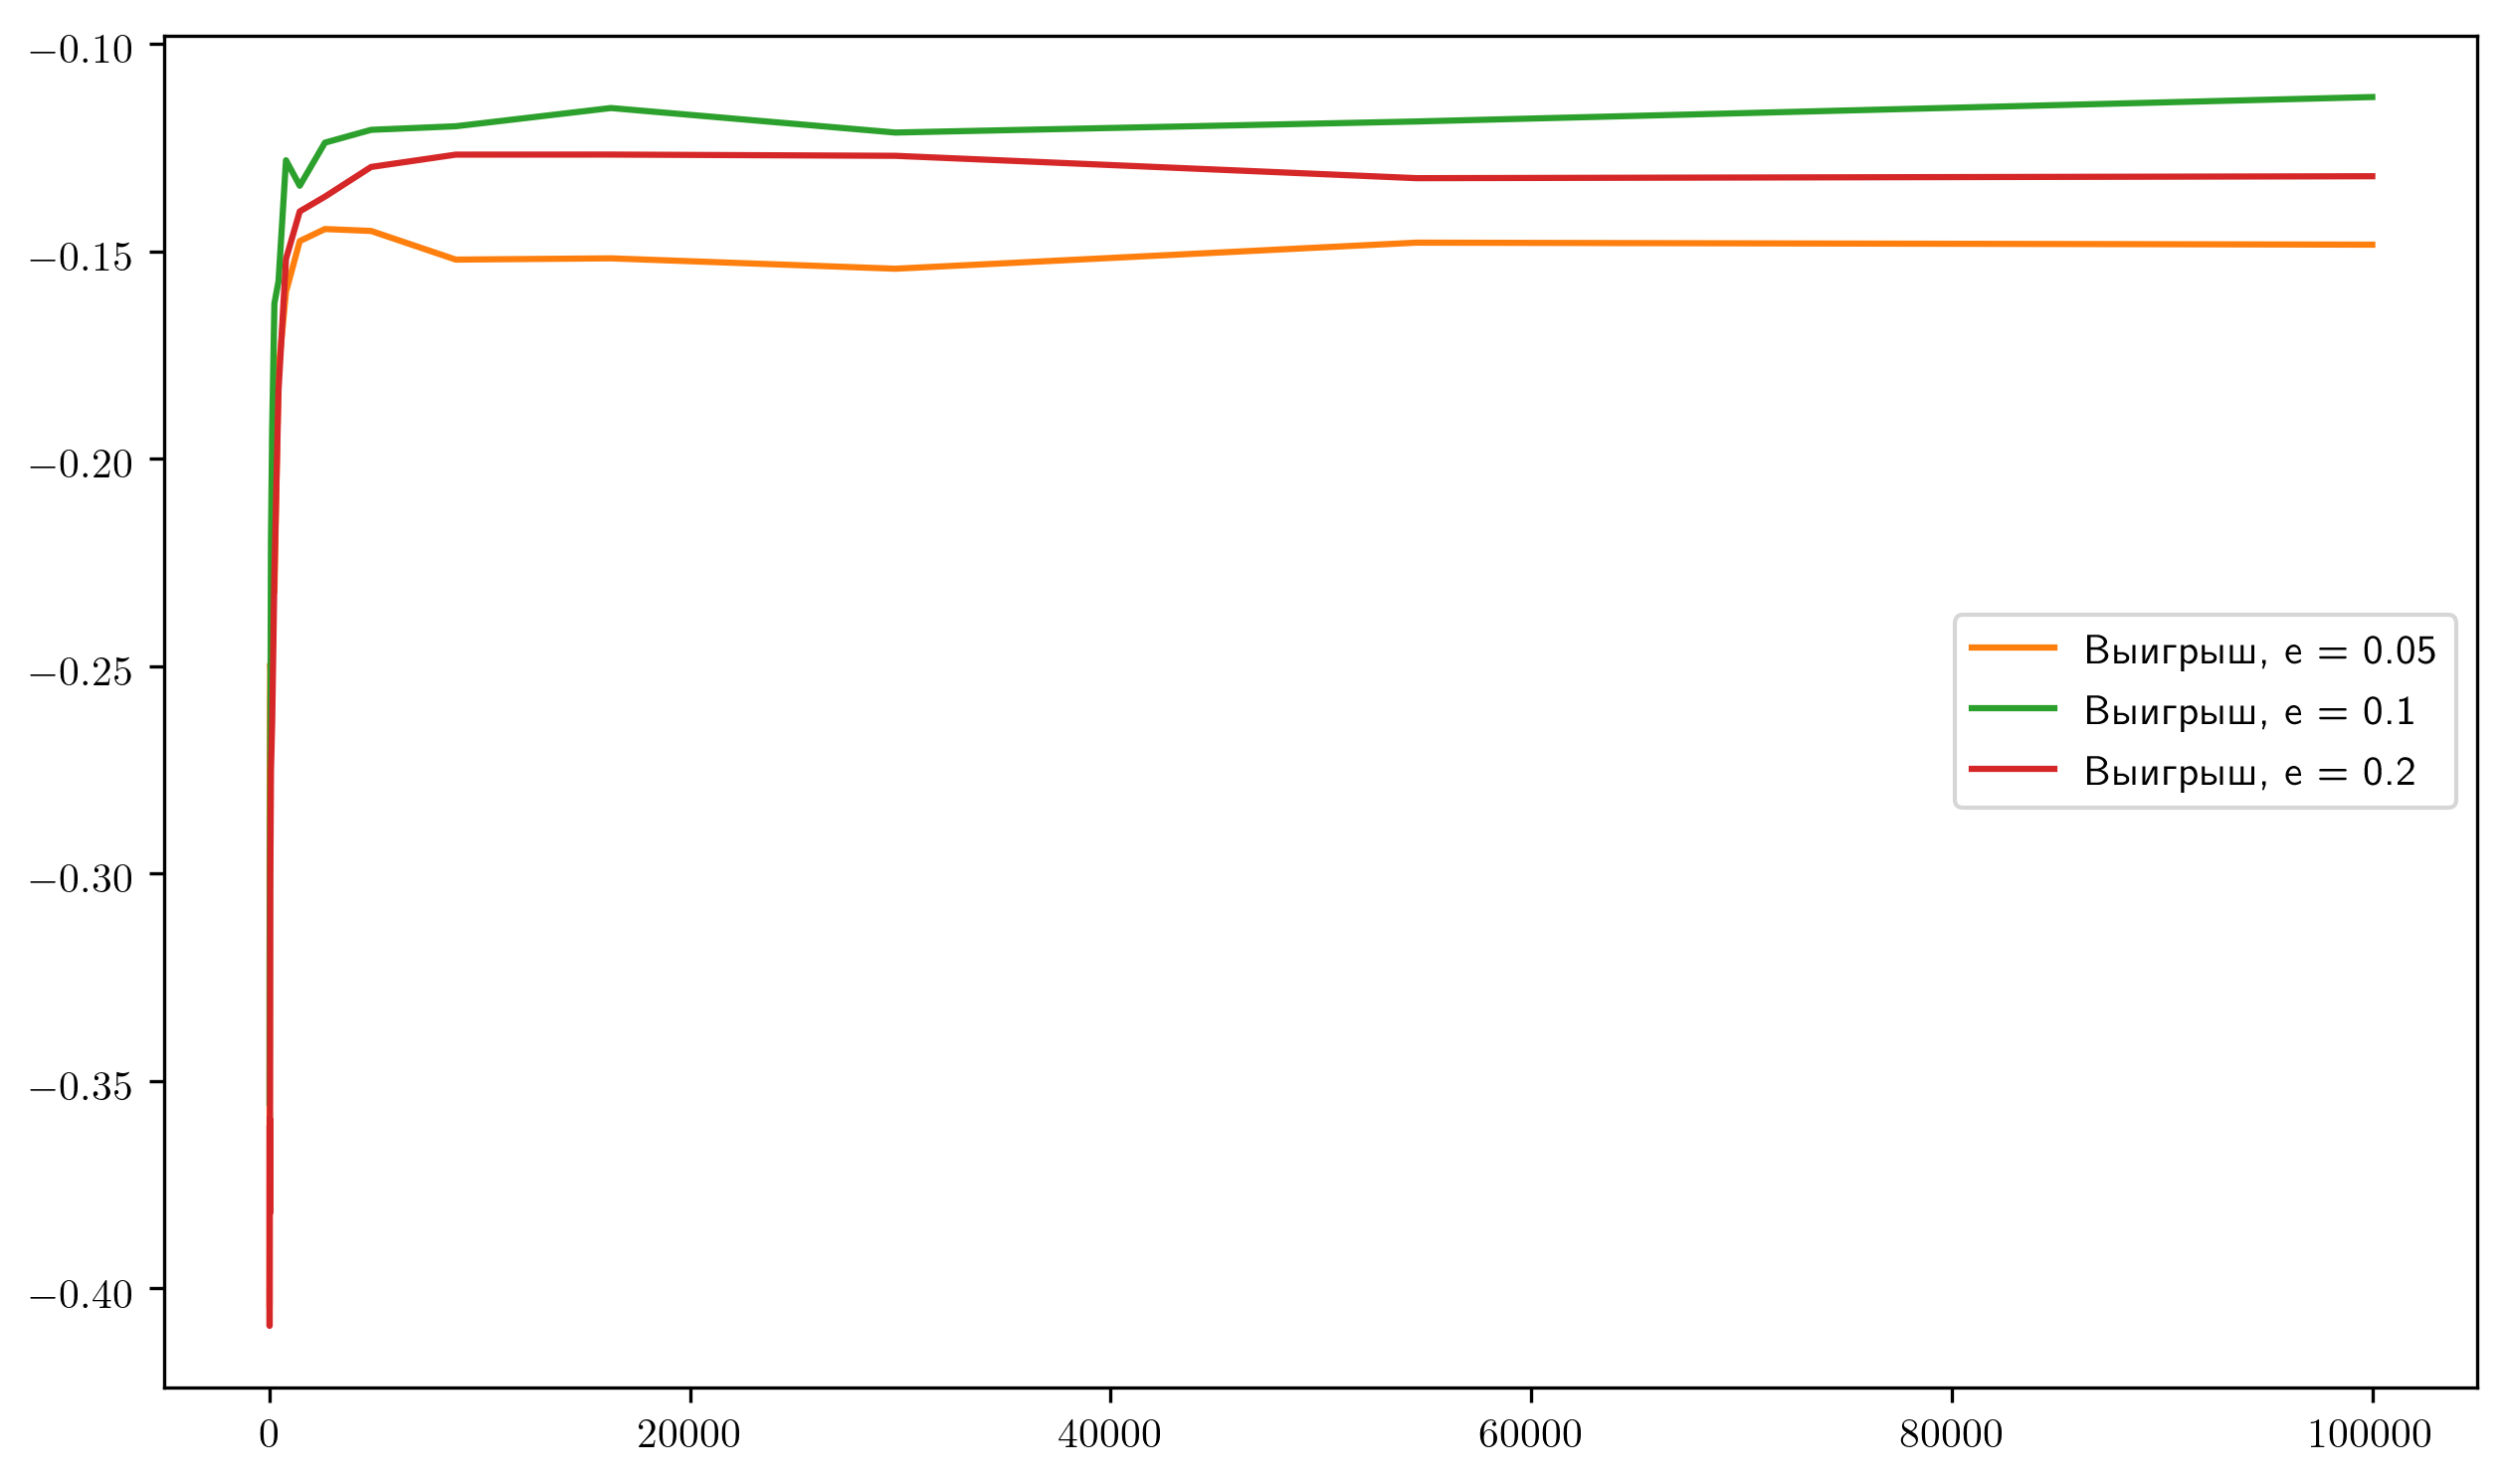

In [226]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x[1:], evaluations[0.05], label="Выигрыш, e = 0.05", color="C1")
ax.plot(x[1:], evaluations[0.1], label="Выигрыш, e = 0.1", color="C2")
ax.plot(x[1:], evaluations[0.2], label="Выигрыш, e = 0.2", color="C3")
ax.legend(loc="center right")